In [1]:
from sklearn.datasets import load_files 
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('../../../data/dog_images/train')
valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load list of dog names
dog_names = [item[24:-1] for item in sorted(glob("../../../data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))




Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [2]:
train_files

array(['../../../data/dog_images/train/095.Kuvasz/Kuvasz_06442.jpg',
       '../../../data/dog_images/train/057.Dalmatian/Dalmatian_04054.jpg',
       '../../../data/dog_images/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg',
       ...,
       '../../../data/dog_images/train/029.Border_collie/Border_collie_02069.jpg',
       '../../../data/dog_images/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03261.jpg',
       '../../../data/dog_images/train/048.Chihuahua/Chihuahua_03416.jpg'], 
      dtype='<U114')

In [3]:
import os

file_list = []
for path, subdirs, files in os.walk('../../../data/dog_images/train'):
    
    for name in files:
        name = name[:-4]
        file_list.append(name)
file_list          

['Mastiff_06833',
 'Mastiff_06826',
 'Mastiff_06871',
 'Mastiff_06812',
 'Mastiff_06831',
 'Mastiff_06867',
 'Mastiff_06845',
 'Mastiff_06865',
 'Mastiff_06866',
 'Mastiff_06862',
 'Mastiff_06853',
 'Mastiff_06877',
 'Mastiff_06839',
 'Mastiff_06824',
 'Mastiff_06814',
 'Mastiff_06842',
 'Mastiff_06813',
 'Mastiff_06851',
 'Mastiff_06820',
 'Mastiff_06852',
 'Mastiff_06846',
 'Mastiff_06870',
 'Mastiff_06854',
 'Mastiff_06817',
 'Mastiff_06819',
 'Mastiff_06850',
 'Mastiff_06844',
 'Mastiff_06841',
 'Mastiff_06858',
 'Mastiff_06861',
 'Mastiff_06818',
 'Mastiff_06864',
 'Mastiff_06863',
 'Mastiff_06876',
 'Mastiff_06811',
 'Mastiff_06848',
 'Mastiff_06832',
 'Mastiff_06849',
 'Mastiff_06843',
 'Mastiff_06860',
 'Mastiff_06834',
 'Mastiff_06857',
 'Mastiff_06829',
 'Mastiff_06822',
 'Mastiff_06840',
 'Mastiff_06875',
 'Mastiff_06874',
 'Mastiff_06837',
 'Mastiff_06879',
 'Mastiff_06856',
 'Mastiff_06868',
 'Mastiff_06821',
 'Mastiff_06869',
 'Mastiff_06835',
 'Mastiff_06838',
 'Mastiff_

In [4]:
processed_names = [''.join([c for c in name if not c.isdigit()]) for name in file_list]
processed_names

['Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinsc

In [5]:
train_names_df = pd.DataFrame(processed_names)
train_names_df.head()

,0
0,Mastiff_
1,Mastiff_
2,Mastiff_
3,Mastiff_
4,Mastiff_


In [6]:
train_names_df.info

<bound method DataFrame.info of              0
0     Mastiff_
1     Mastiff_
2     Mastiff_
3     Mastiff_
4     Mastiff_
5     Mastiff_
6     Mastiff_
7     Mastiff_
8     Mastiff_
9     Mastiff_
10    Mastiff_
11    Mastiff_
12    Mastiff_
13    Mastiff_
14    Mastiff_
15    Mastiff_
16    Mastiff_
17    Mastiff_
18    Mastiff_
19    Mastiff_
20    Mastiff_
21    Mastiff_
22    Mastiff_
23    Mastiff_
24    Mastiff_
25    Mastiff_
26    Mastiff_
27    Mastiff_
28    Mastiff_
29    Mastiff_
...        ...
6650  Lowchen_
6651  Lowchen_
6652  Lowchen_
6653  Lowchen_
6654  Lowchen_
6655  Lowchen_
6656  Lowchen_
6657  Lowchen_
6658  Lowchen_
6659  Lowchen_
6660  Lowchen_
6661  Lowchen_
6662  Lowchen_
6663  Lowchen_
6664  Lowchen_
6665  Lowchen_
6666  Lowchen_
6667  Lowchen_
6668  Lowchen_
6669  Lowchen_
6670  Lowchen_
6671  Lowchen_
6672  Lowchen_
6673  Lowchen_
6674  Lowchen_
6675  Lowchen_
6676  Lowchen_
6677  Lowchen_
6678  Lowchen_
6679  Lowchen_

[6680 rows x 1 columns]>

In [7]:
train_counts = train_names_df[0].value_counts()
train_counts

Alaskan_malamute_                  77
Border_collie_                     74
Basset_hound_                      73
Dalmatian_                         71
Bullmastiff_                       69
Bull_terrier_                      69
Basenji_                           69
Cavalier_king_charles_spaniel_     67
American_staffordshire_terrier_    66
Australian_cattle_dog_             66
Australian_shepherd_               66
Irish_terrier_                     66
Boston_terrier_                    65
Briard_                            65
Bernese_mountain_dog_              65
Dachshund_                         65
Cane_corso_                        64
Affenpinscher_                     64
Golden_retriever_                  64
Boxer_                             64
Bloodhound_                        64
American_eskimo_dog_               64
Belgian_sheepdog_                  64
Flat-coated_retriever_             63
Cairn_terrier_                     63
Akita_                             63
Papillon_   

In [8]:
train_counts.describe()

count    133.000000
mean      50.225564
std       11.863885
min       26.000000
25%       42.000000
50%       50.000000
75%       61.000000
max       77.000000
Name: 0, dtype: float64

In [9]:
train_max = train_counts.max()
train_min = train_counts.min()
train_mean = train_counts.mean()
print("The training set folders contained a range of {} to {} photos, with a mean of {}.".format(train_min, train_max, train_mean))

The training set folders contained a range of 26 to 77 photos, with a mean of 50.225563909774436.


Text(0.5,1,'Number of photos of each breed in the Training Set')

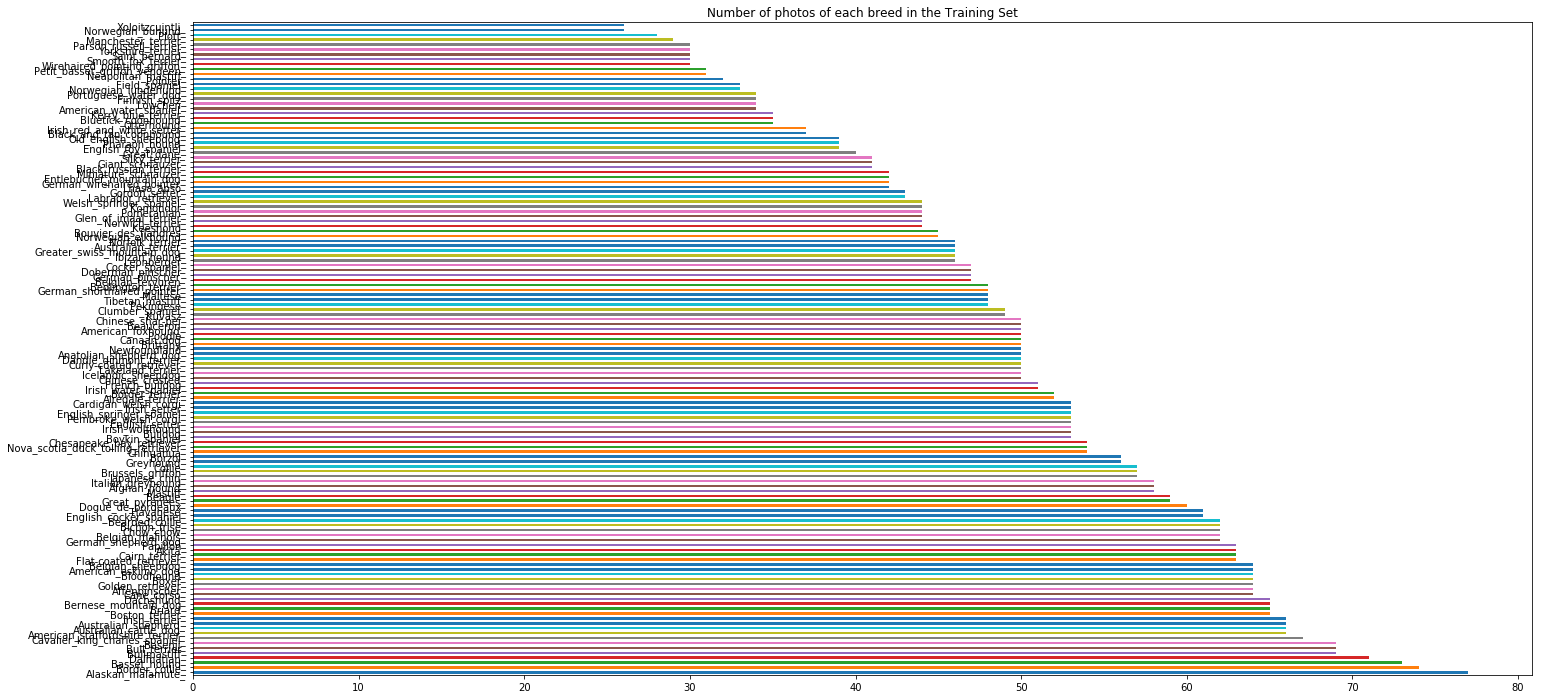

In [10]:
plt.figure(figsize = (24,12))
train_counts.plot(kind = 'barh')
plt.title('Number of photos of each breed in the Training Set')

Text(0.5,1,'Distribution of images per breed in Training Set Data')

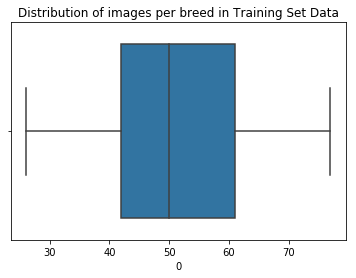

In [11]:
sns.boxplot(train_counts)
plt.title('Distribution of images per breed in Training Set Data')

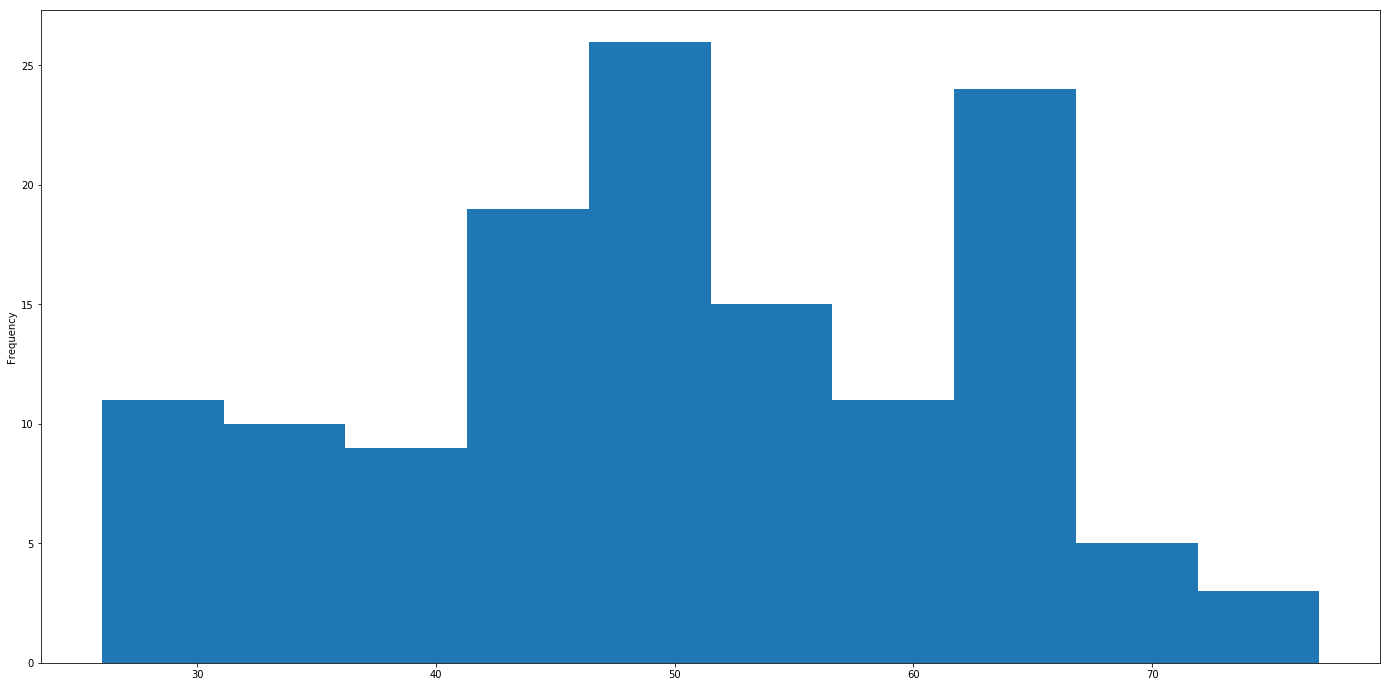

In [12]:
plt.figure(figsize = (24,12))
train_counts.plot(kind = 'hist', bins = 10)

In [13]:
test_file_list = []
for path, subdirs, files in os.walk('../../../data/dog_images/test'):
    
    for name in files:
        name = name[:-4]
        test_file_list.append(name)
test_file_list          

['Mastiff_06873',
 'Mastiff_06815',
 'Mastiff_06878',
 'Mastiff_06825',
 'Mastiff_06836',
 'Mastiff_06847',
 'Mastiff_06827',
 'Doberman_pinscher_04190',
 'Doberman_pinscher_04194',
 'Doberman_pinscher_04156',
 'Doberman_pinscher_04177',
 'Doberman_pinscher_04169',
 'Doberman_pinscher_04203',
 'Curly-coated_retriever_03884',
 'Curly-coated_retriever_03893',
 'Curly-coated_retriever_03887',
 'Curly-coated_retriever_03870',
 'Curly-coated_retriever_03863',
 'Curly-coated_retriever_03901',
 'Curly-coated_retriever_03889',
 'Borzoi_02220',
 'Borzoi_02203',
 'Borzoi_02162',
 'Borzoi_02154',
 'Borzoi_02166',
 'Borzoi_02183',
 'Borzoi_02181',
 'Bichon_frise_01767',
 'Bichon_frise_01759',
 'Bichon_frise_01707',
 'Bichon_frise_01726',
 'Bichon_frise_01760',
 'Bichon_frise_01753',
 'Bichon_frise_01757',
 'Bichon_frise_01719',
 'Chinese_crested_03489',
 'Chinese_crested_03498',
 'Chinese_crested_03484',
 'Chinese_crested_03524',
 'Chinese_crested_03508',
 'Chinese_crested_03490',
 'Finnish_spitz_

In [14]:
test_processed_names = [''.join([c for c in name if not c.isdigit()]) for name in test_file_list]
test_processed_names

['Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Mastiff_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Doberman_pinscher_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Curly-coated_retriever_',
 'Borzoi_',
 'Borzoi_',
 'Borzoi_',
 'Borzoi_',
 'Borzoi_',
 'Borzoi_',
 'Borzoi_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Bichon_frise_',
 'Chinese_crested_',
 'Chinese_crested_',
 'Chinese_crested_',
 'Chinese_crested_',
 'Chinese_crested_',
 'Chinese_crested_',
 'Finnish_spitz_',
 'Finnish_spitz_',
 'Finnish_spitz_',
 'Finnish_spitz_',
 'Welsh_springer_spaniel_',
 'Welsh_springer_spaniel_',
 'Welsh_springer_spaniel_',
 'Welsh_springer_spaniel_',
 'Welsh_springer_spaniel_',
 'Bed

In [15]:
test_names_df = pd.DataFrame(test_processed_names)
test_names_df.shape

(836, 1)

In [16]:
test_counts = test_names_df[0].value_counts()
test_counts

Alaskan_malamute_                 10
Border_collie_                    10
Basset_hound_                     10
Dalmatian_                         9
Basenji_                           9
Bullmastiff_                       9
Australian_cattle_dog_             9
Cavalier_king_charles_spaniel_     9
Dachshund_                         9
Bull_terrier_                      9
Australian_shepherd_               9
Bearded_collie_                    8
American_eskimo_dog_               8
Havanese_                          8
Boxer_                             8
Bernese_mountain_dog_              8
English_cocker_spaniel_            8
Chow_chow_                         8
Flat-coated_retriever_             8
Irish_terrier_                     8
Briard_                            8
Italian_greyhound_                 8
Golden_retriever_                  8
Dogue_de_bordeaux_                 8
Papillon_                          8
Boston_terrier_                    8
Bichon_frise_                      8
B

In [17]:
test_counts.describe()

count    133.000000
mean       6.285714
std        1.712571
min        3.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: 0, dtype: float64

In [18]:
test_max = test_counts.max()
test_min = test_counts.min()
test_mean = test_counts.mean()
print("The test set folders contained a range of {} to {} photos, with a mean of {}.".format(test_min, test_max, test_mean))

The test set folders contained a range of 3 to 10 photos, with a mean of 6.285714285714286.


Text(0.5,1,'Number of photos of each breed in the Test Set')

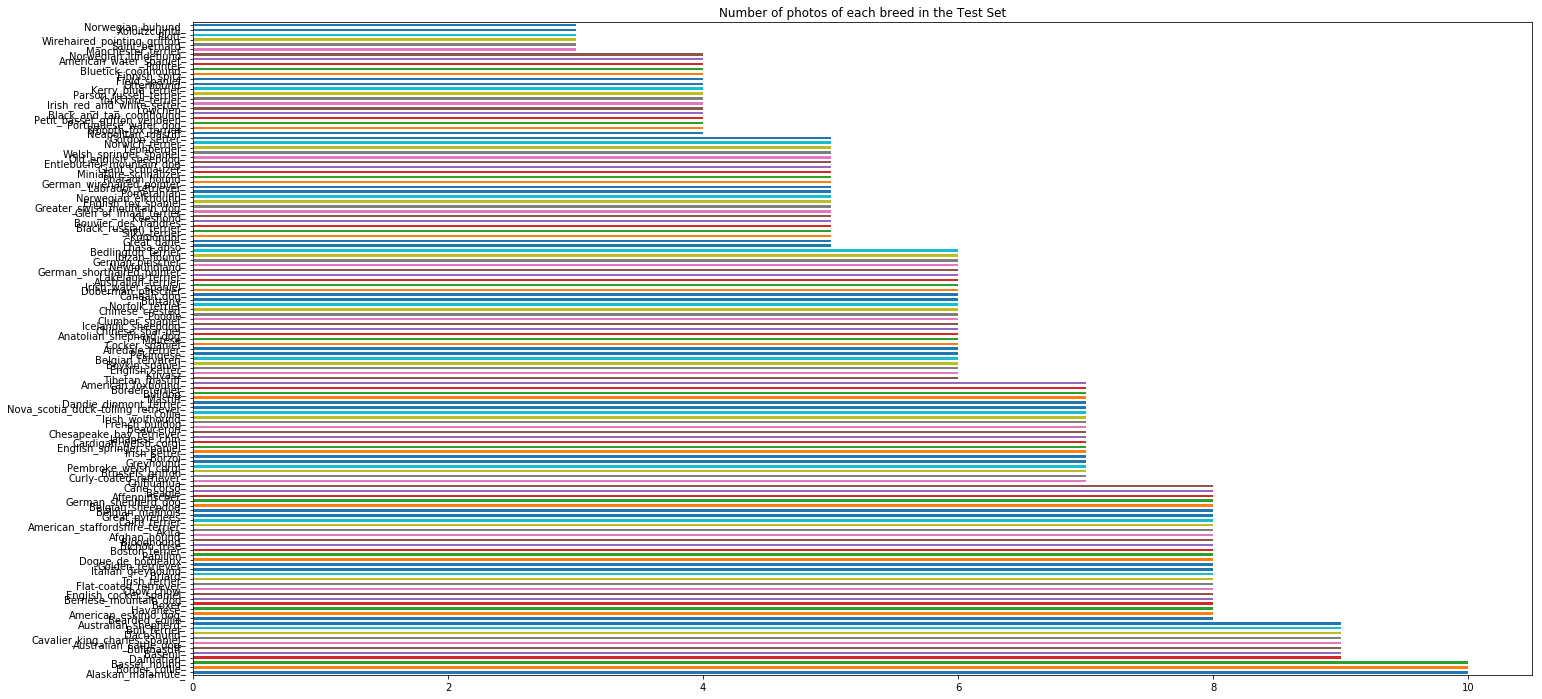

In [19]:
plt.figure(figsize = (24,12))
test_counts.plot(kind = 'barh')
plt.title('Number of photos of each breed in the Test Set')

Text(0.5,1,'Distribution of images per breed in Test Set Data')

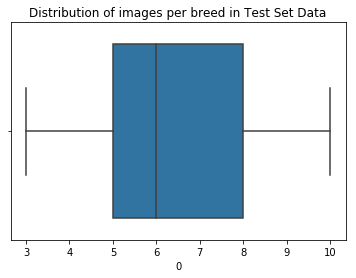

In [20]:
sns.boxplot(test_counts)
plt.title('Distribution of images per breed in Test Set Data')